<a href="https://colab.research.google.com/github/ratulKabir/Classification-of-the-102-Category-Flowers-Dataset/blob/master/Final_draft_Cnn_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
- 1. Importing Libraries
- 2. Loading and Preparing Data
- 3. Defining Model
 - 3.1. Simple small CNN
   - 3.1.1. Plotting train and validation accuracy/loss
   - 3.1.2. Confusion Matrix
   - 3.1.3. Precision per class and average precision
   - 3.1.4. Visualizing 0 and 1 precision classes
 - 3.2. Simple big CNN
   - 3.2.1. Plotting train, validation accuracy, loss
   - 3.2.2. Confusion Matrix
   - 3.2.3. Precision
 - 3.3. Adding Dropout
   - 3.3.1 Accuracy/Loss
   - 3.3.2. Average Precision
 - 3.4. Adding Gaussian Noise
   - 3.4.1 Accuracy/Loss
 - 3.5. Dropout and Glorot together
   - 3.5.1. Loss/accuracy
   - 3.5.2. Average Precision
 - 3.6. Spatial Dropout
   - 3.6.1 Accuracy/Loss
   - 3.6.2. Average Precision
- 4. Final Simple small CNN
 - 4.1. Plotting train, validation accuracy, loss
 - 4.2. Confusion Matrix
 - 4.3. Precision
 - 4.4. Visualizing 0 and 1 precision classes



## 1. Importing Libraries

In [0]:
% tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from tensorflow.keras import models, layers

from google.colab import drive
from matplotlib import pyplot as plt

## 2. Loading and Preparing Data

In [0]:
##Mounting The Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir("drive/My Drive/Colab Notebooks/flowers")

In [0]:
# Loading pickled data

pickle_in = open("resized_train_data.pickle","rb")
train_data = pickle.load(pickle_in)

pickle_in = open("resized_val_data.pickle","rb")
validation_data = pickle.load(pickle_in)

pickle_in = open("resized_test_data.pickle","rb")
test_data = pickle.load(pickle_in)

No blueish pics anymore, thanks to Voeller!!!

10


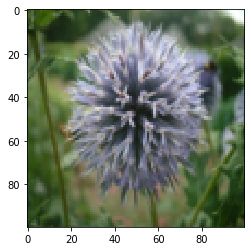

In [0]:
print(train_data[300][1])
plt.imshow(train_data[300][0])

In [0]:
train_img = []
train_lbl = []
for elem in range(len(train_data)):
  train_img.append(train_data[elem][0])
  train_lbl.append(train_data[elem][1])
  if train_lbl[elem] == 102:
    train_lbl[elem] = 0

validation_img = []
validation_lbl = []
for elem in range(len(validation_data)):
  validation_img.append(validation_data[elem][0])
  validation_lbl.append(validation_data[elem][1])
  if validation_lbl[elem] == 102:
    validation_lbl[elem] = 0

test_img = []
test_lbl = []
for elem in range(len(test_data)):
  test_img.append(test_data[elem][0])
  test_lbl.append(test_data[elem][1])
  if test_lbl[elem] == 102:
    test_lbl[elem] = 0

In [0]:
train_img = np.asarray(train_img)
train_lbl = np.asarray(train_lbl)

test_img = np.asarray(test_img)
test_lbl = np.asarray(test_lbl)

validation_img = np.asarray(validation_img)
validation_lbl = np.asarray(validation_lbl)

data = tf.data.Dataset.from_tensor_slices(
    (train_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255, train_lbl.astype(np.int32)))


data = data.shuffle(buffer_size=60000).batch(64).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255, test_lbl.astype(np.int32))).batch(10000)

validation_data = tf.data.Dataset.from_tensor_slices(
    (validation_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255, validation_lbl.astype(np.int32))).batch(10000)

# for cifar10
train_lbl = train_lbl.reshape((-1,)) 
test_lbl = test_lbl.reshape((-1,))

## 3. Defining Model

#### 3.1. Simple small CNN

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5, restore_best_weights=True)

history = model.fit(data, callbacks=[callback], validation_data = validation_data, steps_per_epoch=200, epochs=10)
#history = model.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=20)

Train for 200 steps, validate for 1 steps
Epoch 1/10
200/200 [==============================] - 3s 16ms/step - loss: 3.0679 - accuracy: 0.2731 - val_loss: 4.6260 - val_accuracy: 0.0140
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 1.5344 - accuracy: 0.5895 - val_loss: 4.7765 - val_accuracy: 0.0420
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.8387 - accuracy: 0.7820 - val_loss: 3.5848 - val_accuracy: 0.1742
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.4368 - accuracy: 0.8958 - val_loss: 2.4172 - val_accuracy: 0.4479
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.2019 - accuracy: 0.9666 - val_loss: 2.4346 - val_accuracy: 0.4808
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0919 - accuracy: 0.9913 - val_loss: 2.8570 - val_accuracy: 0.4507
Epoch 7/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0437 - accuracy: 0.9991

#### 3.1.1. Plotting train and validation accuracy/loss

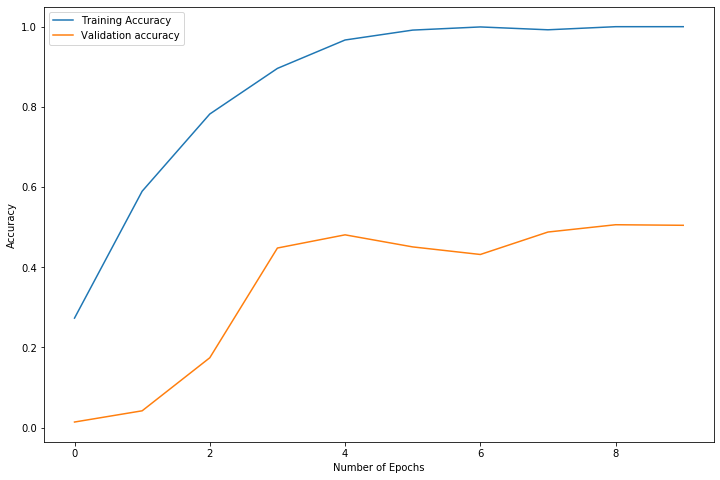

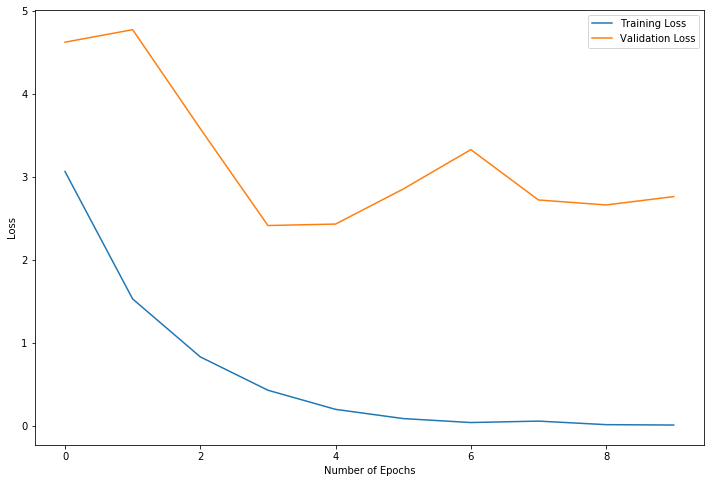

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

In [0]:
test = model.evaluate(test_data)
#print(test)

1/1 [==============================] - 0s 177ms/step - loss: 3.1417 - accuracy: 0.4809


#### 3.1.2. Confusion Matrix
- confusion matrix for multiple classes:
https://www.youtube.com/watch?v=FAr2GmWNbT0
- The matrix columns represent the prediction labels and the rows represent the real labels. The confusion matrix is always a 2-D array of shape [n, n], where n is the number of valid labels for a given classification task.
https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix

In [0]:
# Counting the number of images per class

counts_per_class = []
for class_num in range(102):
  count = 0
  for label in test_lbl:
    if label == class_num:
      count += 1
  counts_per_class.append(count)

# counts_per_class

In [0]:
pred_test = tf.argmax(model(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)
tf.print(conf_mat, summarize=5)

[[5 0 0 0 0 ... 0 0 0 0 0]
 [0 1 0 0 0 ... 0 0 0 0 0]
 [0 0 10 0 0 ... 0 0 0 0 0]
 [0 0 0 0 0 ... 0 0 0 0 0]
 [0 0 0 1 0 ... 0 0 0 0 0]
 ...
 [0 0 0 0 0 ... 3 0 0 0 1]
 [0 0 0 0 1 ... 0 5 0 0 0]
 [0 0 0 0 0 ... 0 0 3 0 0]
 [0 0 0 0 0 ... 0 0 1 4 0]
 [0 0 0 0 0 ... 0 0 1 0 1]]


In [0]:
# conf_pecentage = tf.Variable(tf.zeros(102,102))
conf_mat_percent = conf_mat.numpy()
for i in range(102):
  for j in range(102):
    conf_mat_percent[i,j] = conf_mat[i,j] / counts_per_class[i] * 100 

In [0]:
tf.print(conf_mat_percent, summarize=5)

array([[ 55,   0,   0, ...,   0,   0,   0],
       [  0,  16,   0, ...,   0,   0,   0],
       [  0,   0, 100, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  30,   0,   0],
       [  0,   0,   0, ...,  12,  50,   0],
       [  0,   0,   0, ...,  11,   0,  11]], dtype=int32)


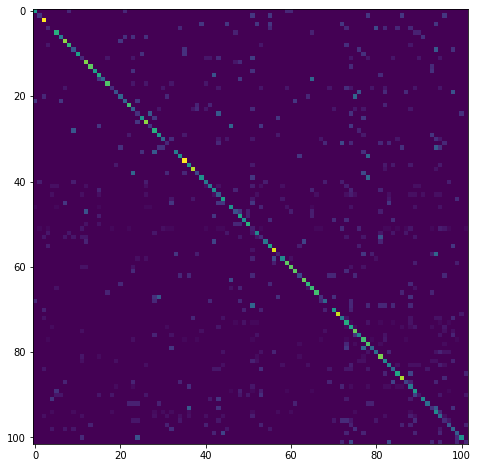

In [0]:
plt.imshow(conf_mat_percent, interpolation='nearest')

#### 3.1.3. Precision per class and average precision

In [0]:
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

('The precision is ',(tf.reduce_sum(precisions) / len(precisions)).numpy())

('The precision is ', 0.47924745735667096)

Text(0.5, 1.0, 'Precision of test data with simple CNN')

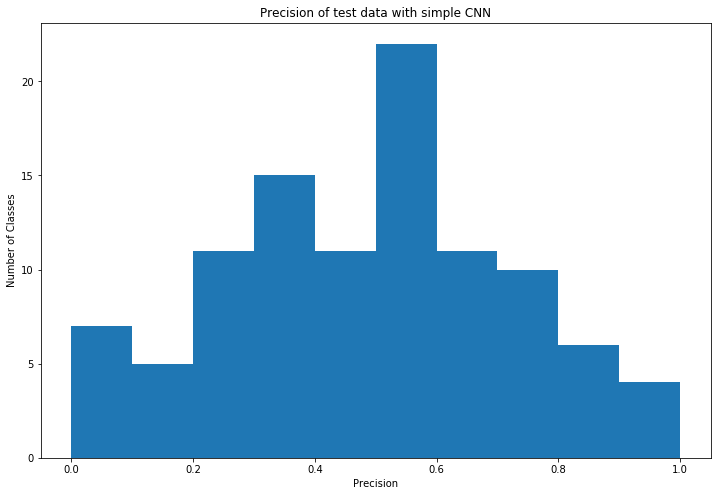

In [0]:
plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data with simple CNN')

#### 3.1.4. Visualizing 0 and 1 precision classes

In [0]:
zero_index = []
one_index = []
for _, prec in enumerate(precisions):
  if prec == 0:
    zero_index.append(_)
  elif prec == 1:
    one_index.append(_)
#zero_index

Showing images with 0 precision

3


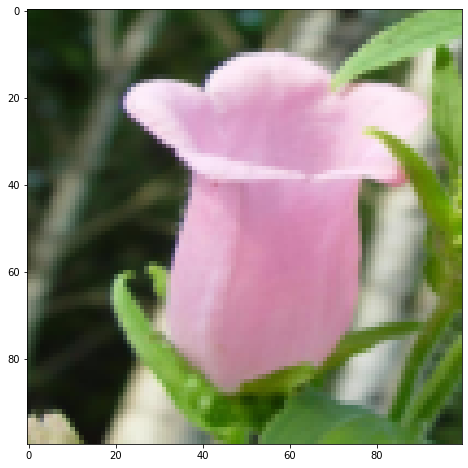

4


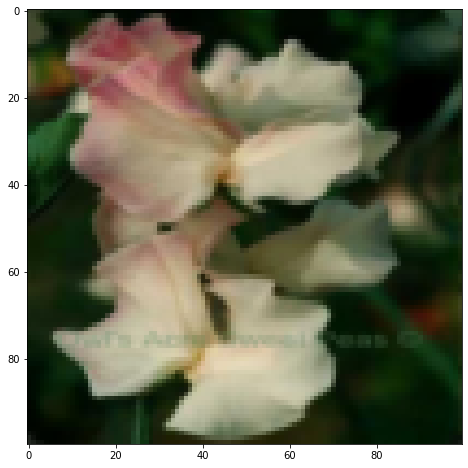

32


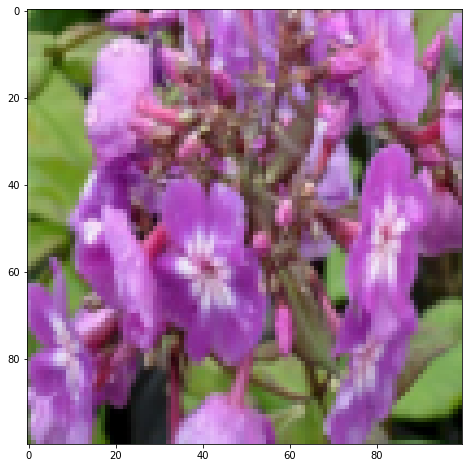

45


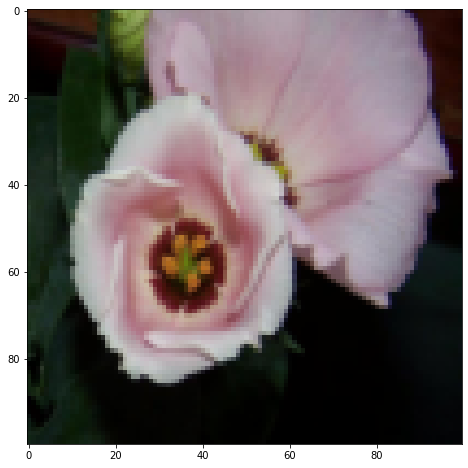

69


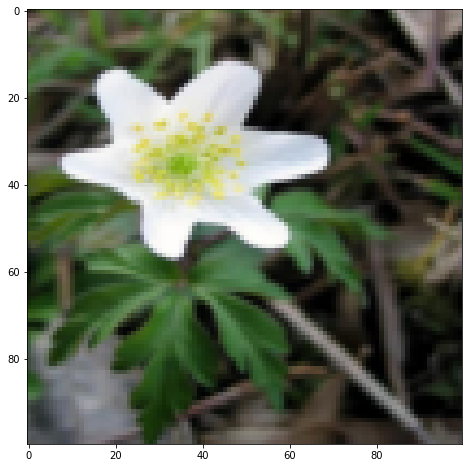

In [0]:
for zero in zero_index:
  print(zero)
  for i in range (len(test_lbl)):
    if test_lbl[i] == zero:
      plt.imshow(test_img[i])
      plt.show()
      break
      #print(test_lbl[i])
      #break

Showing images with precision 1

10


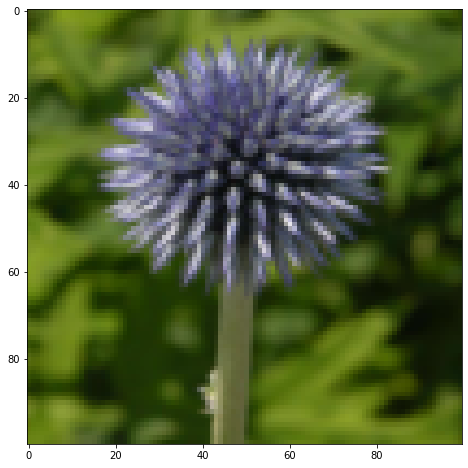

14


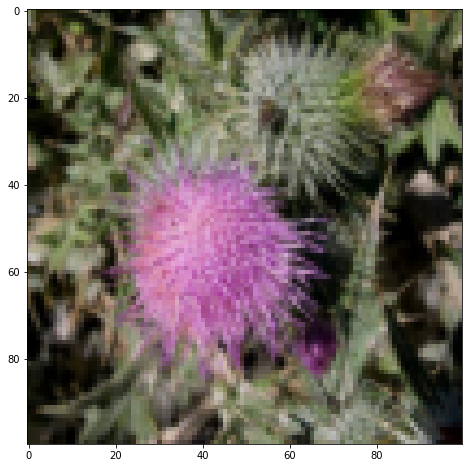

16


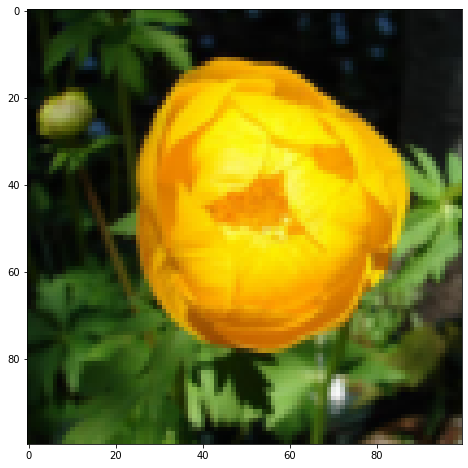

71


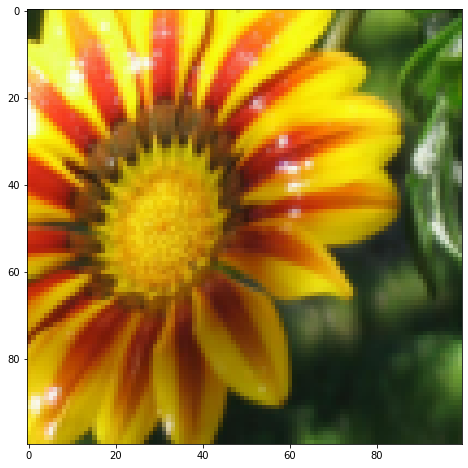

In [0]:
for one in one_index:
  print(one)
  for i in range(len(test_lbl)):
    #print(test_lbl[i])
    if test_lbl[i] == one:
      plt.imshow(test_img[i])
      plt.show()
      #print(i)
      break

#### 3.2. Simple big CNN

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)        

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5, restore_best_weights=True)

history = model.fit(data, callbacks=[callback], validation_data = validation_data, steps_per_epoch=200, epochs=9)
#history = model.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=20)

Train for 200 steps, validate for 1 steps
Epoch 1/9
200/200 [==============================] - 4s 21ms/step - loss: 3.2917 - accuracy: 0.2387 - val_loss: 5.4321 - val_accuracy: 0.0112
Epoch 2/9
200/200 [==============================] - 3s 15ms/step - loss: 1.6963 - accuracy: 0.5479 - val_loss: 9.0970 - val_accuracy: 0.0077
Epoch 3/9
200/200 [==============================] - 3s 15ms/step - loss: 0.8012 - accuracy: 0.7848 - val_loss: 7.6382 - val_accuracy: 0.0371
Epoch 4/9
200/200 [==============================] - 3s 15ms/step - loss: 0.2990 - accuracy: 0.9267 - val_loss: 2.8815 - val_accuracy: 0.3961
Epoch 5/9
200/200 [==============================] - 3s 15ms/step - loss: 0.0934 - accuracy: 0.9838 - val_loss: 2.6165 - val_accuracy: 0.4808
Epoch 6/9
200/200 [==============================] - 3s 14ms/step - loss: 0.0911 - accuracy: 0.9798 - val_loss: 4.3187 - val_accuracy: 0.3520
Epoch 7/9
200/200 [==============================] - 3s 14ms/step - loss: 0.1197 - accuracy: 0.9684 - val_

#### 3.2.1. Plotting train, validation accuracy, loss

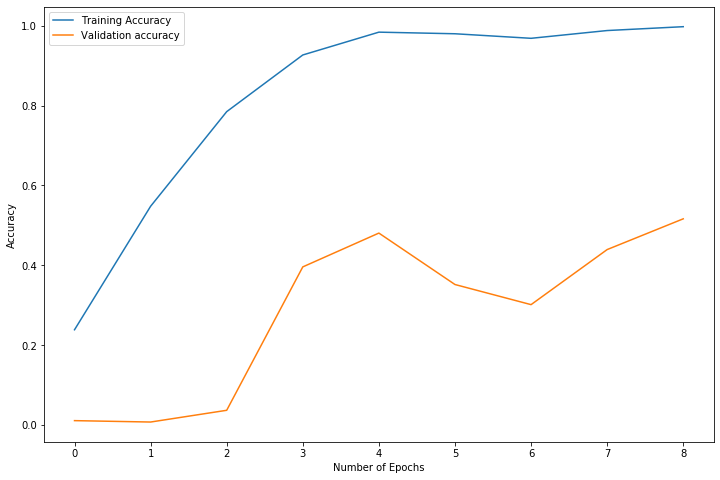

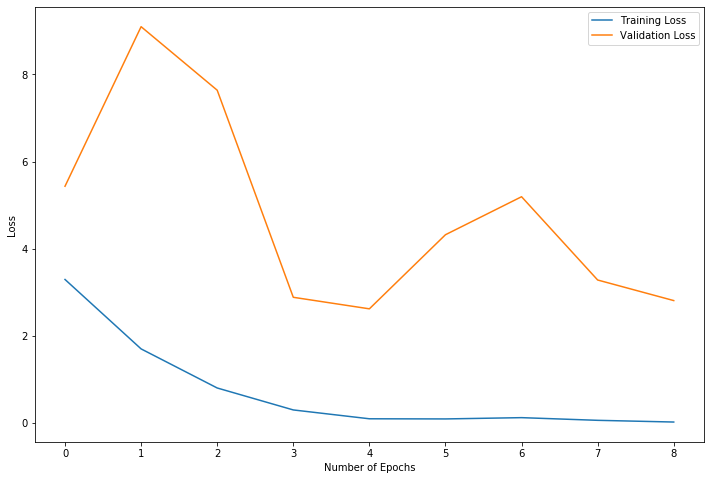

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

In [0]:
test = model.evaluate(test_data)
#print(test)

1/1 [==============================] - 0s 321ms/step - loss: 3.1816 - accuracy: 0.4892


#### 3.2.2. Confusion Matrix


In [0]:
# Counting the number of images per class

counts_per_class = []
for class_num in range(102):
  count = 0
  for label in test_lbl:
    if label == class_num:
      count += 1
  counts_per_class.append(count)

# counts_per_class

In [0]:
pred_test = tf.argmax(model(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)
tf.print(conf_mat, summarize=5)

[[4 0 0 0 0 ... 0 0 0 0 0]
 [0 1 0 0 0 ... 0 0 0 0 0]
 [0 0 10 0 0 ... 0 0 0 0 0]
 [0 0 0 0 1 ... 0 0 0 0 0]
 [0 0 0 0 0 ... 0 0 0 0 0]
 ...
 [0 0 0 0 0 ... 2 0 0 0 0]
 [0 0 0 0 0 ... 0 9 0 0 0]
 [0 0 0 0 0 ... 0 0 4 0 0]
 [0 0 0 0 0 ... 0 0 0 3 0]
 [0 0 0 0 0 ... 0 0 0 0 1]]


In [0]:
# conf_pecentage = tf.Variable(tf.zeros(102,102))
conf_mat_percent = conf_mat.numpy()
for i in range(102):
  for j in range(102):
    conf_mat_percent[i,j] = conf_mat[i,j] / counts_per_class[i] * 100 

In [0]:
tf.print(conf_mat_percent, summarize=5)

array([[ 44,   0,   0, ...,   0,   0,   0],
       [  0,  16,   0, ...,   0,   0,   0],
       [  0,   0, 100, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  40,   0,   0],
       [  0,   0,   0, ...,   0,  37,   0],
       [  0,   0,   0, ...,   0,   0,  11]], dtype=int32)


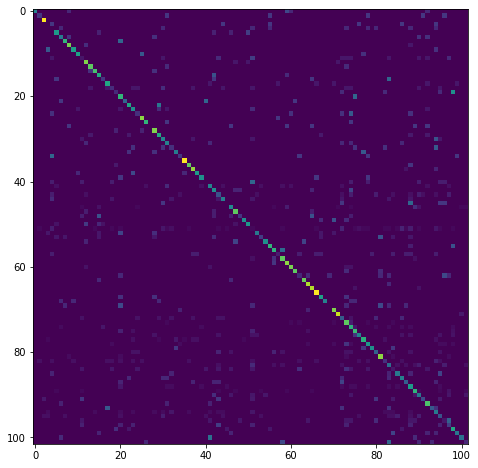

In [0]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.imshow(conf_mat_percent, interpolation='nearest')

#### 3.2.3. Precision

In [0]:
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

('The precision is ',(tf.reduce_sum(precisions) / len(precisions)).numpy())

('The precision is ', 0.48408459523719555)

Text(0.5, 1.0, 'Precision of test data with simple CNN')

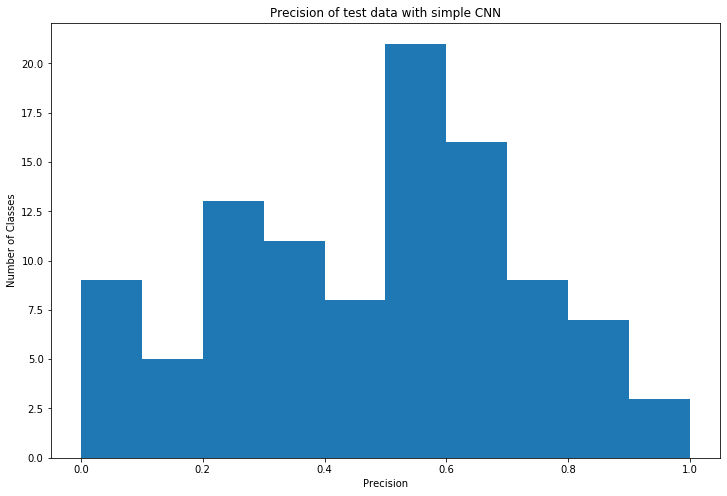

In [0]:
plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data with simple CNN')

#### 3.3. Adding Dropout
Dropout rate of 0.1 works better than 0.15, 0.20 an d0.25

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              #callback=[callback])

history_dropout = model.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=40)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 5, 5, 64)         

#### 3.3.1 Accuracy/Loss

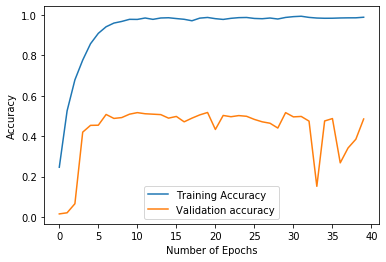

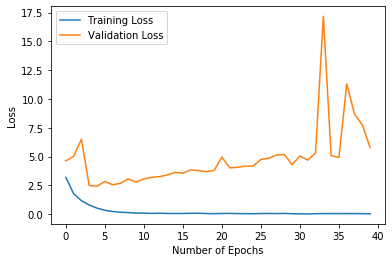

In [0]:
plt.rcParams['figure.figsize'] = [6, 4]

plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

#### 3.3.2. Average Precision

1/1 [==============================] - 0s 175ms/step - loss: 6.6148 - accuracy: 0.4273
Average Precision is  0.45137054376350433


Text(0.5, 1.0, 'Precision of test data after adding dropout')

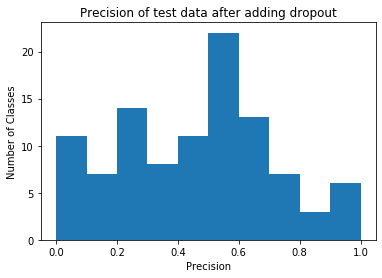

In [0]:
test = model.evaluate(test_data)

# Confusion Matrix
pred_test = tf.argmax(model(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)

# Precision
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

print("Average Precision is ", (tf.reduce_sum(precisions) / len(precisions)).numpy())

plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data after adding dropout')

#### 3.4. Adding Gaussian Noise


In [0]:
model_gauss = models.Sequential()
model_gauss.add(layers.GaussianNoise(stddev=0.5, input_shape=(100,100,3)))
model_gauss.add(layers.Conv2D(32, (3,3), activation='relu'))
model_gauss.add(layers.MaxPooling2D(4,4))
model_gauss.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.1))
model_gauss.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_gauss.add(layers.MaxPooling2D(4,4))
model_gauss.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.1))
model_gauss.add(layers.Flatten())
model_gauss.add(layers.Dense(64, activation='relu'))
model_gauss.add(layers.Dense(102, activation='softmax'))

model_gauss.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_1 (GaussianNo (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 5, 5, 64)        

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2, restore_best_weights=True)

model_gauss.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              #callback=[callback])

In [0]:
history_gaus = model_gauss.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=20)

Train for 200 steps, validate for 1 steps
Epoch 1/20
200/200 [==============================] - 3s 16ms/step - loss: 4.7195 - accuracy: 0.0212 - val_loss: 5.4435 - val_accuracy: 0.0336
Epoch 2/20
200/200 [==============================] - 3s 13ms/step - loss: 4.5896 - accuracy: 0.0251 - val_loss: 6.4541 - val_accuracy: 0.0350
Epoch 3/20
200/200 [==============================] - 2s 12ms/step - loss: 4.5573 - accuracy: 0.0281 - val_loss: 6.9970 - val_accuracy: 0.0217
Epoch 4/20
200/200 [==============================] - 3s 13ms/step - loss: 4.5349 - accuracy: 0.0303 - val_loss: 6.0048 - val_accuracy: 0.0350
Epoch 5/20
200/200 [==============================] - 3s 13ms/step - loss: 4.5238 - accuracy: 0.0304 - val_loss: 6.1586 - val_accuracy: 0.0350
Epoch 6/20
200/200 [==============================] - 2s 12ms/step - loss: 4.5167 - accuracy: 0.0268 - val_loss: 5.2373 - val_accuracy: 0.0350
Epoch 7/20
200/200 [==============================] - 2s 12ms/step - loss: 4.5120 - accuracy: 0.0309

#### 3.4.1 Accuracy/Loss

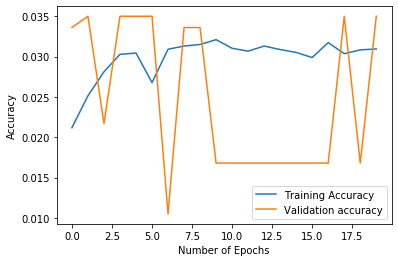

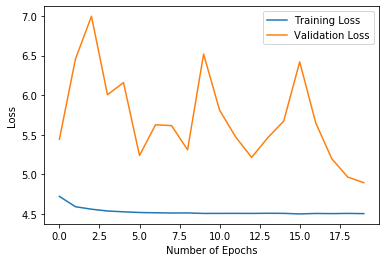

In [0]:
plt.plot(history_gaus.history['accuracy'])
plt.plot(history_gaus.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history_gaus.history['loss'])
plt.plot(history_gaus.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

1/1 [==============================] - 0s 179ms/step - loss: 4.8920 - accuracy: 0.0341
Average Precision is  0.00033430212725312815


Text(0.5, 1.0, 'Precision of test data after adding Gaussian Noise')

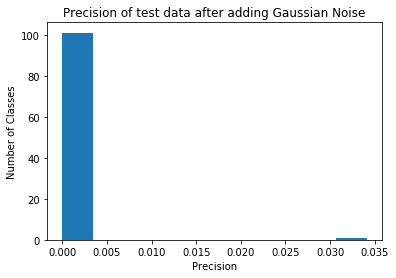

In [0]:
test = model_gauss.evaluate(test_data)

# Confusion Matrix
pred_test = tf.argmax(model_gauss(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)

# Precision
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

print("Average Precision is ", (tf.reduce_sum(precisions) / len(precisions)).numpy())

plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data after adding Gaussian Noise')

#### 3.5. Dropout and Glorot together

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3), kernel_initializer=tf.initializers.glorot_uniform()))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.initializers.glorot_uniform()))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.summary()

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              #callback=[callback])

history_dropout = model.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 5, 5, 64)          256       
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)            

#### 3.5.1. Loss/accuracy

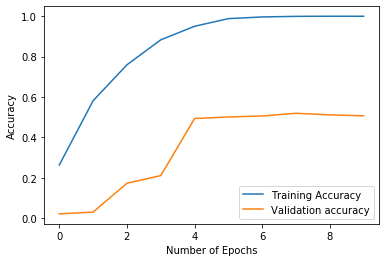

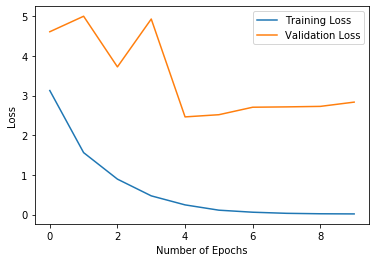

In [0]:
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

#### 3.5.2. Average Precision

1/1 [==============================] - 0s 177ms/step - loss: 3.2040 - accuracy: 0.4649
Average Precision is  0.45982554618491467


Text(0.5, 1.0, 'Precision of test data with glorot initialization and dropout')

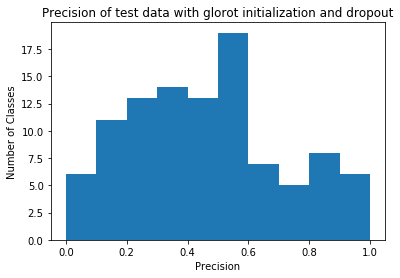

In [0]:
test = model.evaluate(test_data)

# Confusion Matrix
pred_test = tf.argmax(model(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)

# Precision
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

print("Average Precision is ", (tf.reduce_sum(precisions) / len(precisions)).numpy())

plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data with glorot initialization and dropout')

#### 3.6. Spatial Dropout

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              #callback=[callback])

history_dropout = model.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=10)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 5, 5, 64)        

#### 3.6.1 Accuracy/Loss

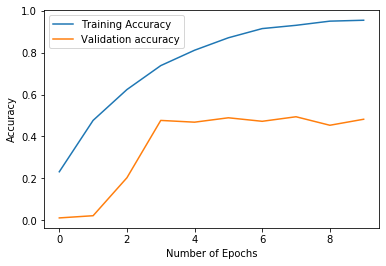

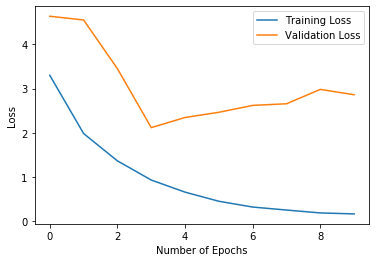

In [0]:
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

#### 3.6.2. Average Precision

1/1 [==============================] - 0s 177ms/step - loss: 3.2852 - accuracy: 0.4405
Average Precision is  0.44952318738666436


Text(0.5, 1.0, 'Precision of test data after adding dropout')

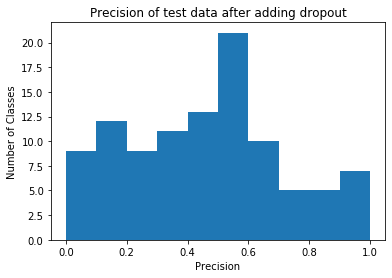

In [0]:
test = model.evaluate(test_data)

# Confusion Matrix
pred_test = tf.argmax(model(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)

# Precision
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

print("Average Precision is ", (tf.reduce_sum(precisions) / len(precisions)).numpy())

plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data after adding dropout')

# 4. Final Simple small CNN
run for longer time

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(4,4))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5, restore_best_weights=True)

history = model.fit(data, callbacks=[callback], validation_data = validation_data, steps_per_epoch=200, epochs=50)
#history = model.fit(data, validation_data = validation_data, steps_per_epoch=200, epochs=20)

Train for 200 steps, validate for 1 steps
Epoch 1/50
200/200 [==============================] - 10s 52ms/step - loss: 3.0961 - accuracy: 0.2696 - val_loss: 4.6495 - val_accuracy: 0.0140
Epoch 2/50
200/200 [==============================] - 3s 14ms/step - loss: 1.5738 - accuracy: 0.5785 - val_loss: 5.0113 - val_accuracy: 0.0301
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.8917 - accuracy: 0.7589 - val_loss: 3.8088 - val_accuracy: 0.1777
Epoch 4/50
200/200 [==============================] - 3s 13ms/step - loss: 0.4784 - accuracy: 0.8813 - val_loss: 17.6155 - val_accuracy: 0.0175
Epoch 5/50
200/200 [==============================] - 3s 13ms/step - loss: 0.2304 - accuracy: 0.9553 - val_loss: 2.8881 - val_accuracy: 0.4325
Epoch 6/50
200/200 [==============================] - 2s 12ms/step - loss: 0.1052 - accuracy: 0.9891 - val_loss: 2.5219 - val_accuracy: 0.5192
Epoch 7/50
200/200 [==============================] - 3s 13ms/step - loss: 0.0514 - accuracy: 0.99

#### 4.1. Plotting train, validation accuracy, loss

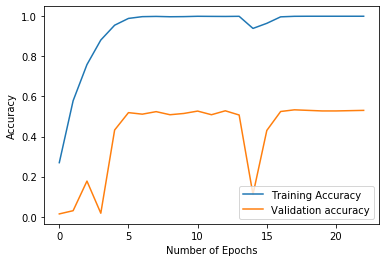

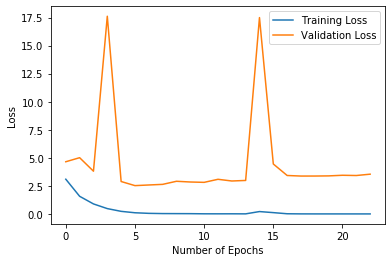

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('Training Loss', 'Validation Loss'))
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

In [0]:
test = model.evaluate(test_data)
#print(test)

1/1 [==============================] - 0s 332ms/step - loss: 3.6630 - accuracy: 0.5177


#### 4.2. Confusion Matrix

In [0]:
# Counting the number of images per class

counts_per_class = []
for class_num in range(102):
  count = 0
  for label in test_lbl:
    if label == class_num:
      count += 1
  counts_per_class.append(count)

# counts_per_class

In [0]:
pred_test = tf.argmax(model(test_img.reshape([-1, 100, 100, 3]).astype(np.float32) / 255), axis=1).numpy()
conf_mat = tf.math.confusion_matrix(test_lbl, pred_test)
tf.print(conf_mat, summarize=5)

[[4 0 0 0 0 ... 0 0 1 0 0]
 [0 2 0 0 0 ... 0 0 0 0 0]
 [0 0 8 0 0 ... 0 0 0 0 0]
 [0 0 1 0 0 ... 0 1 0 0 0]
 [0 0 0 0 0 ... 0 0 0 0 0]
 ...
 [0 0 0 0 0 ... 4 0 0 0 0]
 [0 0 0 0 1 ... 0 7 0 0 0]
 [1 0 0 0 0 ... 0 0 5 0 0]
 [0 0 0 0 0 ... 0 0 1 3 0]
 [0 0 0 0 0 ... 0 0 0 0 3]]


In [0]:
# conf_pecentage = tf.Variable(tf.zeros(102,102))
conf_mat_percent = conf_mat.numpy()
for i in range(102):
  for j in range(102):
    conf_mat_percent[i,j] = conf_mat[i,j] / counts_per_class[i] * 100 

In [0]:
tf.print(conf_mat_percent, summarize=5)

array([[44,  0,  0, ..., 11,  0,  0],
       [ 0, 33,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       ...,
       [10,  0,  0, ..., 50,  0,  0],
       [ 0,  0,  0, ..., 12, 37,  0],
       [ 0,  0,  0, ...,  0,  0, 33]], dtype=int32)


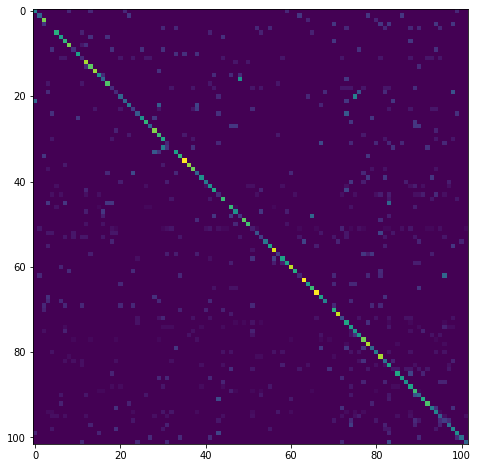

In [0]:
plt.rcParams['figure.figsize'] = [12, 8]

plt.imshow(conf_mat_percent, interpolation='nearest')

#### 4.3. Precision

In [0]:
precisions = []
for i in range(len(conf_mat)):
  if tf.reduce_sum(conf_mat[:, i]) == 0:
    #precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))
    precisions.append(tf.cast(conf_mat[i,i], dtype=tf.dtypes.float64))
  else:
    precisions.append(conf_mat[i,i] / tf.reduce_sum(conf_mat[:, i]))

('The precision is ',(tf.reduce_sum(precisions) / len(precisions)).numpy())

('The precision is ', 0.493537449408948)

Text(0.5, 1.0, 'Precision of test data with simple CNN')

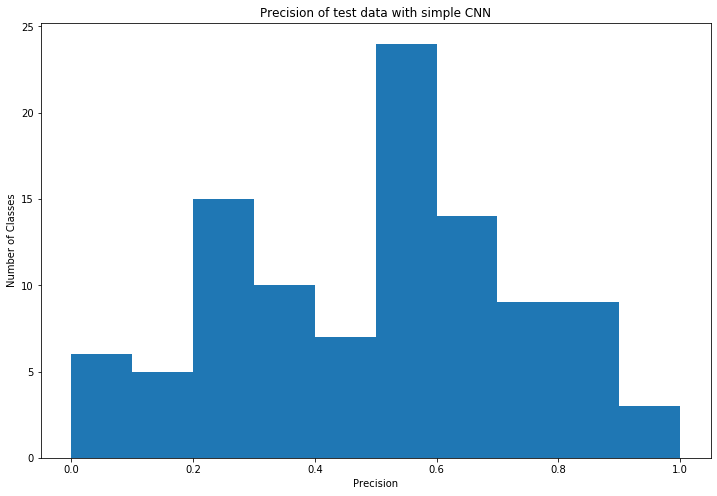

In [0]:
plt.hist(precisions)
plt.xlabel('Precision')
plt.ylabel('Number of Classes')
plt.title('Precision of test data with simple CNN')

#### 4.4. Visualizing 0 and 1 precision classes

In [0]:
zero_index = []
one_index = []
for _, prec in enumerate(precisions):
  if prec == 0:
    zero_index.append(_)
  elif prec == 1:
    one_index.append(_)
#zero_index

Showing images with 0 precision

3


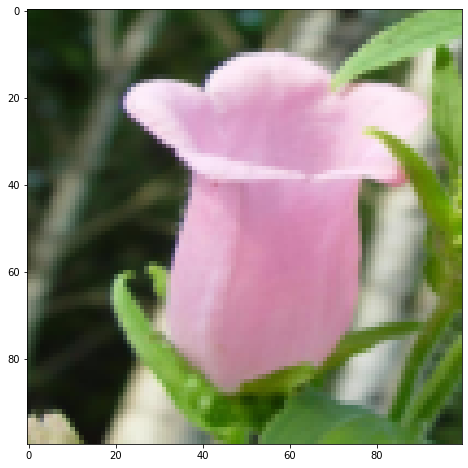

4


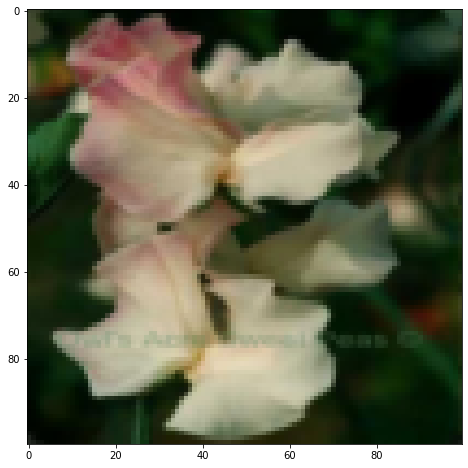

32


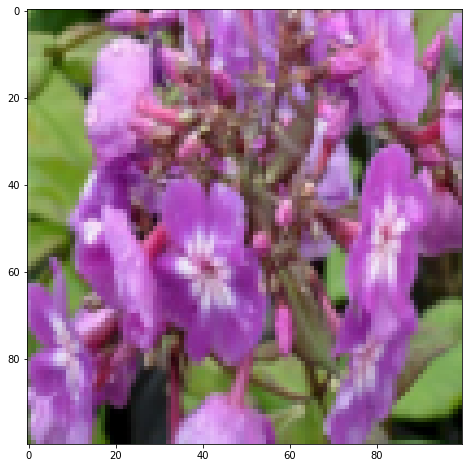

45


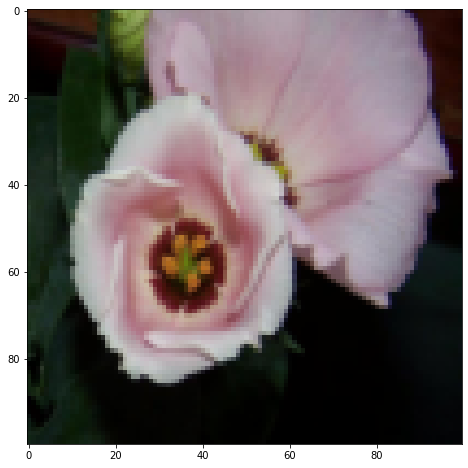

69


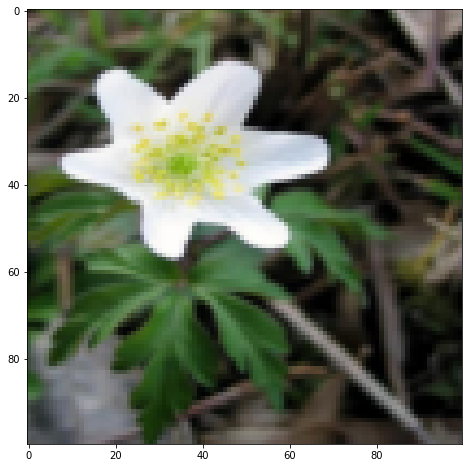

In [0]:
for zero in zero_index:
  print(zero)
  for i in range (len(test_lbl)):
    if test_lbl[i] == zero:
      plt.imshow(test_img[i])
      plt.show()
      break
      #print(test_lbl[i])
      #break

Showing images with precision 1

10


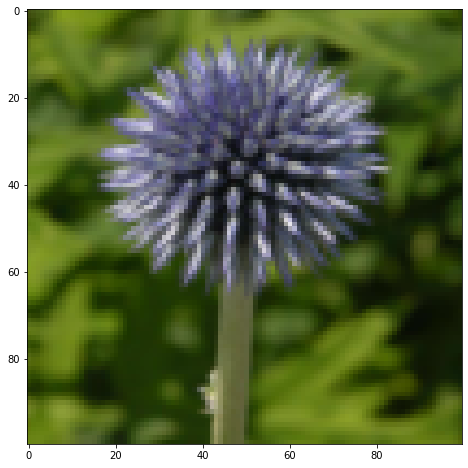

14


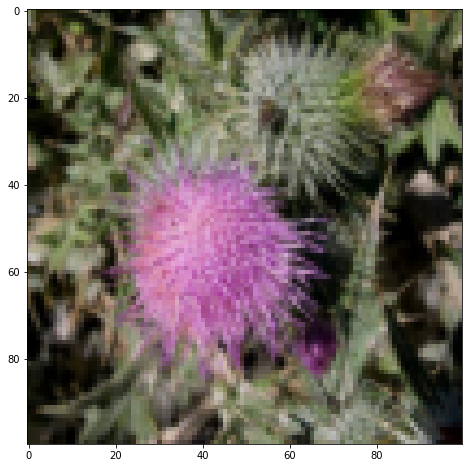

16


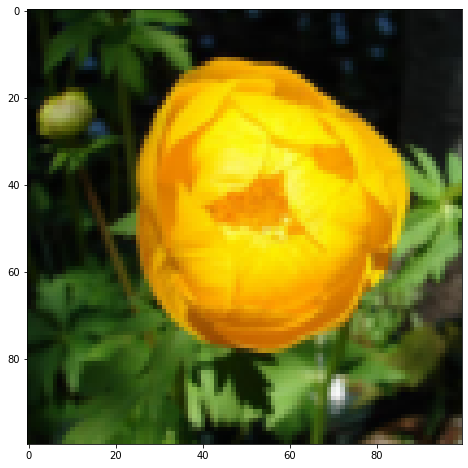

71


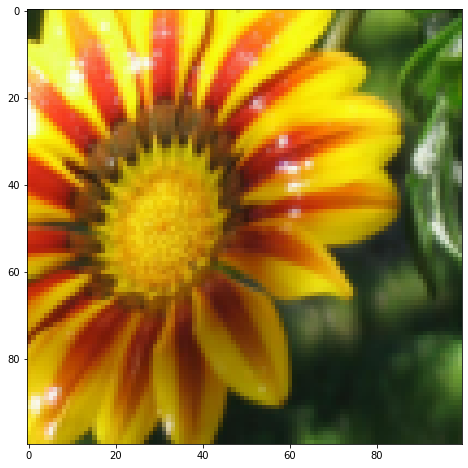

In [0]:
for one in one_index:
  print(one)
  for i in range(len(test_lbl)):
    #print(test_lbl[i])
    if test_lbl[i] == one:
      plt.imshow(test_img[i])
      plt.show()
      #print(i)
      break

Data Augmentation: https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/